# DATA PREPROCESSING

In [40]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os

# Load the data from the CSV file
file_path = 'Input_data/Sheet 2-Table 1.csv'
df = pd.read_csv(file_path)

# Remove commas from 'Z' column and convert to float
df['Z'] = df['Z'].str.replace(',', '').astype(float)

# Define features and target
X = df[['X', 'Y', 'Z']].values
y = df['Label'].astype(int).values  # Converting boolean to int for classification

# Define a custom Dataset class
class CustomDataset(Dataset):
    def __init__(self, X, y=None):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32).view(-1, 1) if y is not None else None

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        if self.y is not None:
            return self.X[idx], self.y[idx]
        else:
            return self.X[idx]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create DataLoader instances
train_dataset = CustomDataset(X_train, y_train)
test_dataset = CustomDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)


# Define the Model

In [41]:
class ImprovedNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size, dropout_rate=0.5):
        super(ImprovedNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.bn1 = nn.BatchNorm1d(hidden_size1)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout_rate)
        
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.bn2 = nn.BatchNorm1d(hidden_size2)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout_rate)
        
        self.fc3 = nn.Linear(hidden_size2, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.fc1(x)
        out = self.bn1(out)
        out = self.relu1(out)
        out = self.dropout1(out)
        
        out = self.fc2(out)
        out = self.bn2(out)
        out = self.relu2(out)
        out = self.dropout2(out)
        
        out = self.fc3(out)
        out = self.sigmoid(out)
        return out


Epoch [10/100], Loss: 0.7787
Epoch [20/100], Loss: 0.5407
Epoch [30/100], Loss: 0.8661
Epoch [40/100], Loss: 0.6356
Epoch [50/100], Loss: 0.7186
Epoch [60/100], Loss: 0.7847
Epoch [70/100], Loss: 0.6895
Epoch [80/100], Loss: 0.7591
Epoch [90/100], Loss: 0.7438
Epoch [100/100], Loss: 0.6702


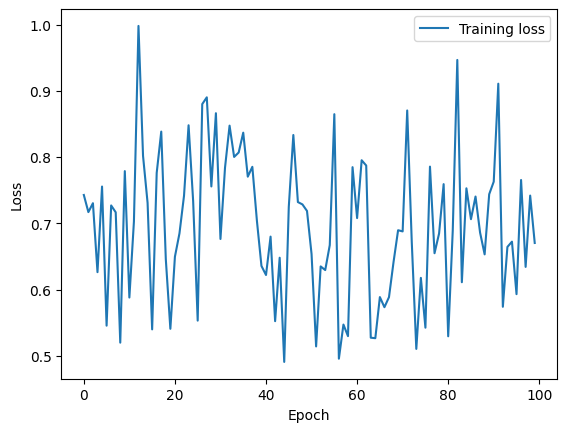

Model has been saved in the "trained_models" directory.


In [42]:
# Initialize the model, loss function, and optimizer
input_size = X_train.shape[1]
hidden_size1 = 64
hidden_size2 = 32
output_size = 1
dropout_rate = 0.5

model = ImprovedNN(input_size, hidden_size1, hidden_size2, output_size, dropout_rate)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 100
train_losses = []

for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        # Forward pass
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    train_losses.append(loss.item())
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Plot the training loss
plt.plot(train_losses, label='Training loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Save the trained model
os.makedirs('trained_models', exist_ok=True)
torch.save(model.state_dict(), 'trained_models/improved_nn_model.pth')
print('Model has been saved in the "trained_models" directory.')


In [43]:
import torch
import torch.nn as nn

class ImprovedNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size, dropout_rate=0.5):
        super(ImprovedNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.bn1 = nn.BatchNorm1d(hidden_size1)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout_rate)
        
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.bn2 = nn.BatchNorm1d(hidden_size2)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout_rate)
        
        self.fc3 = nn.Linear(hidden_size2, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.fc1(x)
        out = self.bn1(out)
        out = self.relu1(out)
        out = self.dropout1(out)
        
        out = self.fc2(out)
        out = self.bn2(out)
        out = self.relu2(out)
        out = self.dropout2(out)
        
        out = self.fc3(out)
        out = self.sigmoid(out)
        return out

def load_model(model_path):
    input_size = 3  # Number of features
    hidden_size1 = 64
    hidden_size2 = 32
    output_size = 1
    dropout_rate = 0.5

    model = ImprovedNN(input_size, hidden_size1, hidden_size2, output_size, dropout_rate)
    model.load_state_dict(torch.load(model_path))
    model.eval()
    return model

def make_predictions(model):
    # Hardcoded data for predictions
    data = [
        [354, 1009.56, 1672712]
    ]
    
    # Convert to tensor
    X = torch.tensor(data, dtype=torch.float32)

    # Make predictions
    with torch.no_grad():
        outputs = model(X)
        predictions = outputs.numpy().flatten()
    
    return predictions

# Example usage:
model_path = 'trained_models/improved_nn_model.pth'
model = load_model(model_path)
predictions = make_predictions(model)
print(predictions)


[0.5099258]
